# Oversampling

Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance. The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.


One approach to addressing imbalanced datasets is to oversample the minority class. There are many oversampling techniques. In the following sections, we will review some of the more common methods.


## Synthetic Minority Oversampling Technique (SMOTE)

- A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.

- Oversampling is duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.


- An improvement on duplicating examples from the minority class is to synthesize new examples from the minority class. This is a type of data augmentation for tabular data and can be very effective.

**How SMOTE Works**

- This technique selects examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

- Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

- This procedure can be used to create as many synthetic examples for the minority class as are required.

- papers suggest first using random undersampling to trim the number of examples in the majority class, then use SMOTE to oversample the minority class to balance the class distribution.

- The approach is effective because new synthetic examples from the minority class are created that are plausible, that is, are relatively close in feature space to existing examples from the minority class.

- A general downside of the approach is that synthetic examples are created without considering the majority class, possibly resulting in ambiguous examples if there is a strong overlap for the classes.

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/



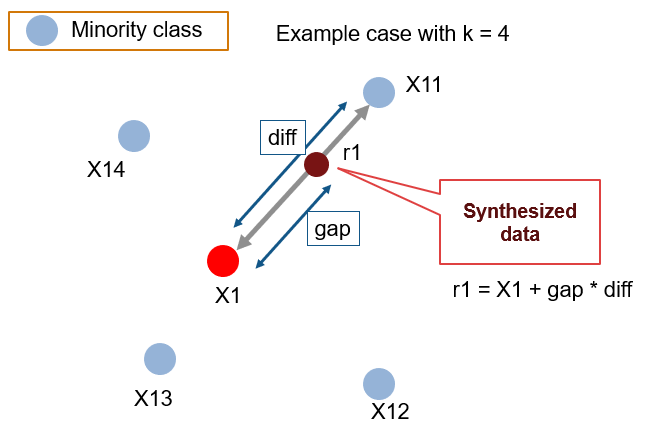

## Creating an Imbalance Dataset

We can define a synthetic binary classification dataset using the `make_classification()` function from the `scikit-learn` library. For example, we can create 10,000 examples with two input variables and a 1:100 distribution as follows.

### Imports

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from numpy import where
from matplotlib import pyplot
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


### define dataset

In [ ]:
x, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

### summarize class distribution

In [ ]:
counter = Counter(y)
counter

Counter({0: 9900, 1: 100})

### scatter plot of examples by class label

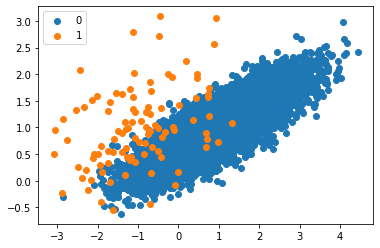

In [ ]:
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(x[row_ix, 0], x[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

The plot shows the large mass of points that belong to the majority class (blue) and a small number of points spread out for the minority class (orange). We can see some measure of overlap between the two classes

Next, we can oversample the minority class using SMOTE and plot the transformed dataset

##SMOTE Implementation

The SMOTE class acts like a data transform object from scikit-learn in that it must be defined and configured, fit on a dataset, then applied to create a new transformed version of the dataset.

**SMOTE Transformation**


We define a SMOTE instance with default parameters that will balance the minority class and then fit and apply it in one step to create a transformed version of our datase

In [ ]:
# transform the dataset
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)



**summarizing the new class distribution**


Once transformed, we can summarize the class distribution of the new transformed dataset, which would expect to now be balanced through the creation of many new synthetic examples in the minority class.

In [ ]:
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 9900})


### scatter plot of examples by class label after oversampling

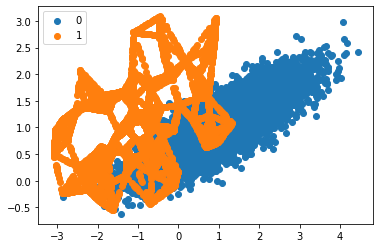

In [ ]:
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(x[row_ix, 0], x[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

The plot shows many more examples in the minority class created along the lines between the original examples in the minority class.

## Combining SMOTE with Random Undersampling of the Majority Class

The imbalanced-learn library supports random undersampling via the RandomUnderSampler class.

### Combined Method

We can update the example to first oversample the minority class to have 10 percent the number of examples of the majority class (e.g. about 1,000), then use random undersampling to reduce the number of examples in the majority class to have 50 percent more than the minority class (e.g. about 2,000).

To implement this, we can specify the desired ratios as arguments to the SMOTE and RandomUnderSampler classes;

In [ ]:
x, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

In [ ]:
over = SMOTE(sampling_strategy = 0.1)
under = RandomUnderSampler(sampling_strategy = 0.5)

**Pipeline**

The Pipeline can then be applied to a dataset, performing each transformation in turn and returning a final dataset with the accumulation of the transform applied to it, in this case oversampling followed by undersampling.

In [ ]:
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

The pipeline can then be fit and applied to our dataset just like a single transform:



In [ ]:
# transform the dataset
x_new, y_new = pipeline.fit_resample(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


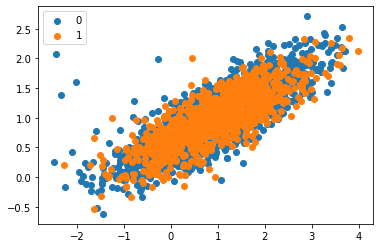

In [ ]:
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y_new == label)[0]
	pyplot.scatter(x[row_ix, 0], x[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [ ]:
# summarize the new class distribution
counter = Counter(y_new)
print(counter)

Counter({0: 1980, 1: 990})


## Smote for Classification

We can use SMOTE as a data preparation method when fitting and evaluating machine learning algorithms in scikit-learn

The algorithm is defined with any required hyperparameters (we will use the defaults), then we will use repeated stratified k-fold cross-validation to evaluate the model. We will use three repeats of 10-fold cross-validation, meaning that 10-fold cross-validation is applied three times fitting and evaluating 30 models on the dataset.

The dataset is stratified, meaning that each fold of the cross-validation split will have the same class distribution as the original dataset, in this case, a 1:100 ratio. We will evaluate the model using the ROC area under curve (AUC) metric. This can be optimistic for severely imbalanced datasets but will still show a relative change with better performing models.

In [ ]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)


In [ ]:
# define model
model = DecisionTreeClassifier()

In [ ]:
# evaluate
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

Once fit, we can calculate and report the mean of the scores across the folds and repeats

In [ ]:
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.766


### Combining Oversampling and Undersampling Using Pipeline

In [ ]:
# define dataset
x_com, y_com = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

In [ ]:
# define pipeline
model = DecisionTreeClassifier()
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)


In [ ]:
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, x_com, y_com, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.844


In this case, we can see that the reported ROC AUC shows an additional lift to about 0.83. We could explore testing different ratios of the minority class and majority class (e.g. changing the sampling_strategy argument) to see if a further lift in performance is possible.

### Different K Nearest Neighbors

nother area to explore would be to test different values of the k-nearest neighbors selected in the SMOTE procedure when each new synthetic example is created. The default is k=5, although larger or smaller values will influence the types of examples created, and in turn, may impact the performance of the model.

For example, we could grid search a range of values of k, such as values from 1 to 7, and evaluate the pipeline for each value.

In [ ]:
# define dataset
X_kn, y_kn = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

In [ ]:
# values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7]

We perform SMOTE oversampling with different k values for the KNN used in the procedure, followed by random undersampling and fitting a decision tree on the resulting training dataset.

In [ ]:
for k in k_values:
	# define pipeline
	model = DecisionTreeClassifier()
	over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
	under = RandomUnderSampler(sampling_strategy=0.5)
	steps = [('over', over), ('under', under), ('model', model)]
	pipeline = Pipeline(steps=steps)
	# evaluate pipeline
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X_kn, y_kn, scoring='roc_auc', cv=cv, n_jobs=-1)
	score = np.mean(scores)
	print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.817
> k=2, Mean ROC AUC: 0.835
> k=3, Mean ROC AUC: 0.831
> k=4, Mean ROC AUC: 0.835
> k=5, Mean ROC AUC: 0.852
> k=6, Mean ROC AUC: 0.847
> k=7, Mean ROC AUC: 0.846


In this case, the results suggest that a k=3 might be good with a ROC AUC of about 0.84, and k=7 might also be good with a ROC AUC of about 0.85.

This highlights that both the amount of oversampling and undersampling performed (sampling_strategy argument) and the number of examples selected from which a partner is chosen to create a synthetic example (k_neighbors) may be important parameters to select and tune for your dataset.

# SMOTE With Selective Synthetic Sample Generation

We can be selective about the examples in the minority class that are oversampled using SMOTE.

In this section, we will review some extensions to SMOTE that are more selective regarding the examples from the minority class that provide the basis for generating new synthetic examples.

## Borderline-SMOTE

A popular extension to SMOTE involves selecting those instances of the minority class that are misclassified, such as with a k-nearest neighbor classification model.

We can then oversample just those difficult instances, providing more resolution only where it may be required.

Instead of generating new synthetic examples for the minority class blindly, we would expect the Borderline-SMOTE method to only create synthetic examples along the decision boundary between the two classes

In [ ]:
# define dataset
X_bord, y_bord = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

In [ ]:
# summarize class distribution
counter = Counter(y_bord)
print(counter)

Counter({0: 9900, 1: 100})


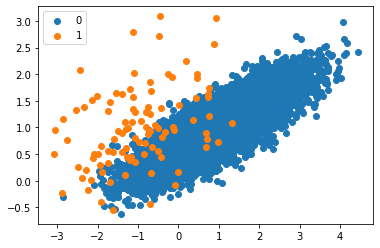

In [ ]:
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y_bord == label)[0]
	pyplot.scatter(X_bord[row_ix, 0], X_bord[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [ ]:
# transform the dataset
oversample = BorderlineSMOTE()
X_bord, y_bord = oversample.fit_resample(X_bord, y_bord)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# summarize the new class distribution
counter = Counter(y_bord)
print(counter)

Counter({0: 9900, 1: 9900})


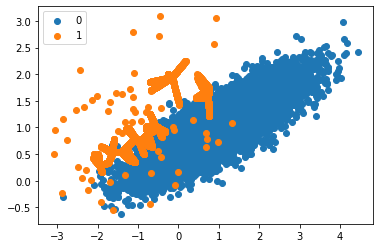

In [ ]:
# scatter plot of examples by class label after borderline 
for label, _ in counter.items():
	row_ix = where(y_bord == label)[0]
	pyplot.scatter(X_bord[row_ix, 0], X_bord[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

The plot shows that those examples far from the decision boundary are not oversampled. This includes both examples that are easier to classify (those orange points toward the top left of the plot) and those that are overwhelmingly difficult to classify given the strong class overlap (those orange points toward the bottom right of the plot).

## Borderline-SMOTE SVM

an alternative of Borderline-SMOTE is where an SVM algorithm is used instead of a KNN to identify misclassified examples on the decision boundary.

An SVM is used to locate the decision boundary defined by the support vectors and examples in the minority class that close to the support vectors become the focus for generating synthetic examples.

In addition to using an SVM, the technique attempts to select regions where there are fewer examples of the minority class and tries to extrapolate towards the class boundary.

In [ ]:
# define dataset
X_svm, y_svm = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

In [ ]:
# summarize class distribution
counter = Counter(y_svm)
print(counter)

Counter({0: 9900, 1: 100})


In [ ]:
# transform the dataset
oversample_svm = SVMSMOTE()
X_svm, y_svm = oversample_svm.fit_resample(X_svm, y_svm)

In [ ]:
# summarize the new class distribution
counter = Counter(y_svm)
print(counter)

Counter({0: 9900, 1: 9900})


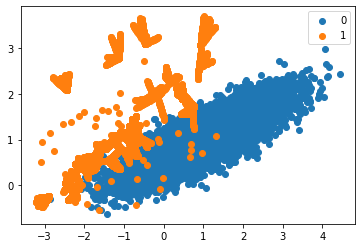

In [ ]:
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y_svm == label)[0]
	pyplot.scatter(X_svm[row_ix, 0], X_svm[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

A scatter plot of the dataset is created showing the directed oversampling along the decision boundary with the majority class.

We can also see that unlike Borderline-SMOTE, more examples are synthesized away from the region of class overlap, such as toward the top left of the plot.

## Adaptive Synthetic Sampling (ADASYN)

Another approach involves generating synthetic samples inversely proportional to the density of the examples in the minority class.

That is, generate more synthetic examples in regions of the feature space where the density of minority examples is low, and fewer or none where the density is high.

ADASYN is based on the idea of adaptively generating minority data samples according to their distributions: more synthetic data is generated for minority class samples that are harder to learn compared to those minority samples that are easier to learn.

We can implement this procedure using the ADASYN class in the imbalanced-learn library.

In [ ]:
# define dataset
X_ads, y_ads = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

In [ ]:
# summarize class distribution
counter = Counter(y_ads)
print(counter)

Counter({0: 9900, 1: 100})


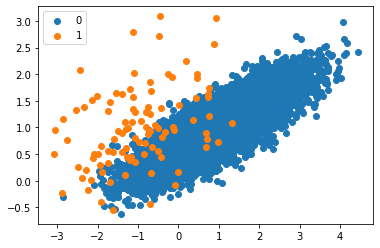

In [ ]:
# scatter plot of examples by class label before transformation
for label, _ in counter.items():
	row_ix = where(y_ads == label)[0]
	pyplot.scatter(X_ads[row_ix, 0], X_ads[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [ ]:
# transform the dataset
oversample_ads = ADASYN()
X_ads, y_ads = oversample_ads.fit_resample(X_ads, y_ads)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# summarize the new class distribution
counter = Counter(y_ads)
print(counter)

Counter({0: 9900, 1: 9899})


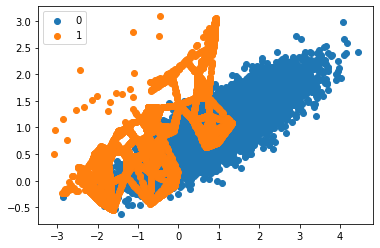

In [ ]:
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y_ads == label)[0]
	pyplot.scatter(X_ads[row_ix, 0], X_ads[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

A scatter plot of the transformed dataset is created. Like Borderline-SMOTE, we can see that synthetic sample generation is focused around the decision boundary as this region has the lowest density.

Unlike Borderline-SMOTE, we can see that the examples that have the most class overlap have the most focus. On problems where these low density examples might be outliers, the ADASYN approach may put too much attention on these areas of the feature space, which may result in worse model performance.

It may help to remove outliers prior to applying the oversampling procedure, and this might be a helpful heuristic to use more generally.